In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon
from shapely import affinity

# shapely.affinity.affine_transform(geom, matrix)

### 返回一个使用仿射变换矩阵变换后的几何对象。

# shapely.affinity.rotate(geom, angle, origin=’center’, use_radians=False)

### 返回一个二维平面上的旋转几何对象。

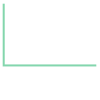

In [2]:
line = LineString([(1, 3), (1, 1), (4, 1)])
line

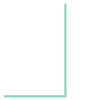

In [3]:
# 使用center作为旋转原点，逆时针旋转90°
roated_a = affinity.rotate(line , 90)
roated_a

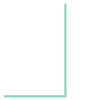

In [4]:
# 使用centroid作为旋转原点，逆时针旋转90°
roated_b = affinity.rotate(line , 90 , origin="centroid")
roated_b

Text(1.4, 1.6, '(1.9 , 1.4)')

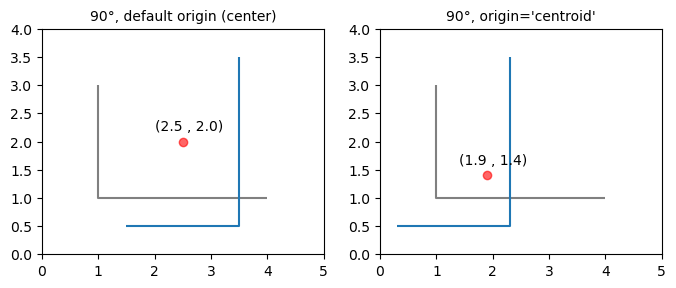

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(1,2 , figsize=(8,8))

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="gray")
gpd.GeoDataFrame([roated_a] , columns=["geometry"]).plot(ax=ax[0])
gpd.GeoDataFrame([line.envelope.centroid] , columns=["geometry"]).plot(ax=ax[0] , facecolor="red" , alpha=0.6)
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,4)
ax[0].set_title("90\N{DEGREE SIGN}, default origin (center)" , fontsize=10)
ax[0].text(2.0, 2.2, r'(2.5 , 2.0)', fontsize=10)

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1] , edgecolor="gray")
gpd.GeoDataFrame([roated_b] , columns=["geometry"]).plot(ax=ax[1])
gpd.GeoDataFrame([line.centroid] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red" , alpha=0.6)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,4)
ax[1].set_title("90\N{DEGREE SIGN}, origin='centroid'" , fontsize=10)
ax[1].text(1.4, 1.6, r'(1.9 , 1.4)', fontsize=10)

# shapely.affinity.scale(geom, xfact=1.0, yfact=1.0, zfact=1.0, origin=’center’)

### 返回一个按比例缩放的几何对象，沿每个维度都有相应的缩放系数。

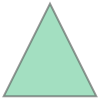

In [6]:
triangle = Polygon([(1, 1), (2, 3), (3, 1)])
triangle

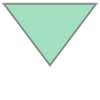

In [7]:
# 沿x方向放大1.5倍，并在y轴上进行镜像
triangle_a = affinity.scale(triangle, xfact=1.5, yfact=-1)
triangle_a

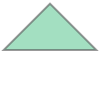

In [8]:
# 沿x方向放大2倍，自定义原点在（1，1）
triangle_b = affinity.scale(triangle, xfact=2, origin=(1,1))
triangle_b

Text(0.6, 1.3, '(1 , 1)')

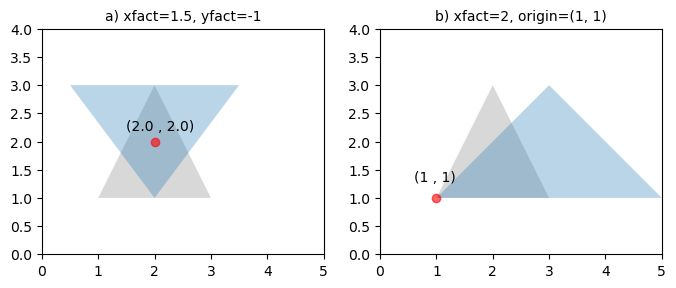

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(1,2 , figsize=(8,8))

gpd.GeoDataFrame([triangle] , columns=["geometry"]).plot(ax=ax[0] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([triangle_a] , columns=["geometry"]).plot(ax=ax[0] , alpha=0.3)
gpd.GeoDataFrame([triangle.envelope.centroid] , columns=["geometry"]).plot(ax=ax[0] , facecolor="red" , alpha=0.6)
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,4)
ax[0].set_title("a) xfact=1.5, yfact=-1" , fontsize=10)
ax[0].text(1.5, 2.2, r'(2.0 , 2.0)', fontsize=10)

gpd.GeoDataFrame([triangle] , columns=["geometry"]).plot(ax=ax[1] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([triangle_b] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
gpd.GeoDataFrame([Point(1,1)] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red" , alpha=0.6)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,4)
ax[1].set_title("b) xfact=2, origin=(1, 1)" , fontsize=10)
ax[1].text(0.6, 1.3, r'(1 , 1)', fontsize=10)

# shapely.affinity.skew(geom, xs=0.0, ys=0.0, origin=’center’, use_radians=False)

### 返回一个沿x和y维度设定的角度进行扭曲操作的几何对象。

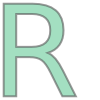

In [10]:
from shapely.wkt import loads as load_wkt

# 读取数据，生成R形几何对象
R = load_wkt('''\
POLYGON((2.218 2.204, 2.273 2.18, 2.328 2.144, 2.435 2.042, 2.541 1.895,
  2.647 1.702, 3 1, 2.626 1, 2.298 1.659, 2.235 1.777, 2.173 1.873,
  2.112 1.948, 2.051 2.001, 1.986 2.038, 1.91 2.064, 1.823 2.08, 1.726 2.085,
  1.347 2.085, 1.347 1, 1 1, 1 3.567, 1.784 3.567, 1.99 3.556, 2.168 3.521,
  2.319 3.464, 2.441 3.383, 2.492 3.334, 2.536 3.279, 2.604 3.152,
  2.644 3.002, 2.658 2.828, 2.651 2.712, 2.63 2.606, 2.594 2.51, 2.545 2.425,
  2.482 2.352, 2.407 2.29, 2.319 2.241, 2.218 2.204),
 (1.347 3.282, 1.347 2.371, 1.784 2.371, 1.902 2.378, 2.004 2.4, 2.091 2.436,
  2.163 2.487, 2.219 2.552, 2.259 2.63, 2.283 2.722, 2.291 2.828, 2.283 2.933,
  2.259 3.025, 2.219 3.103, 2.163 3.167, 2.091 3.217, 2.004 3.253, 1.902 3.275,
  1.784 3.282, 1.347 3.282))''')
R

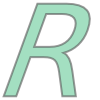

In [11]:
# 沿X方向的扭曲角度为20°，原点在（1，1）
skew_a = affinity.skew(R , xs=20 , origin=(1,1))
skew_a

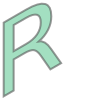

In [12]:
# 沿Y方向的扭曲角度为30°，使用默认原点
skew_b = affinity.skew(R , ys=30)
skew_b

Text(1.1, 2.6, '(2.0, 2.2835)')

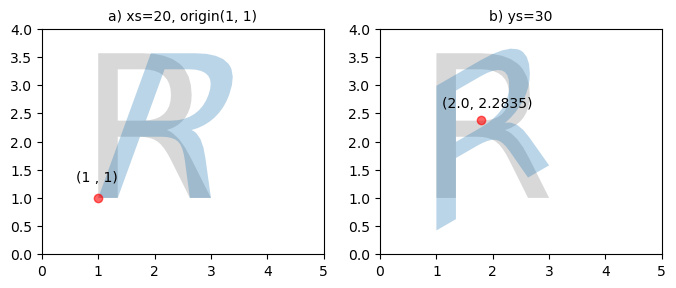

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(1,2 , figsize=(8,8))

gpd.GeoDataFrame([R] , columns=["geometry"]).plot(ax=ax[0] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([skew_a] , columns=["geometry"]).plot(ax=ax[0] , alpha=0.3)
gpd.GeoDataFrame([Point(1,1)] , columns=["geometry"]).plot(ax=ax[0] , facecolor="red" , alpha=0.6)
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,4)
ax[0].set_title("a) xs=20, origin(1, 1)" , fontsize=10)
ax[0].text(0.6, 1.3, r'(1 , 1)', fontsize=10)

gpd.GeoDataFrame([R] , columns=["geometry"]).plot(ax=ax[1] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([skew_b] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
gpd.GeoDataFrame([R.centroid] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red" , alpha=0.6)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,4)
ax[1].set_title("b) ys=30" , fontsize=10)
ax[1].text(1.1, 2.6, r'(2.0, 2.2835)', fontsize=10)

# shapely.affinity.translate(geom, xoff=0.0, yoff=0.0, zoff=0.0)

### 返回一个沿各维度平移的几何对象。

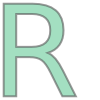

In [14]:
R

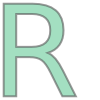

In [15]:
# 沿X方向平移1
translate_a = affinity.translate(R , xoff = 1)
translate_a

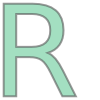

In [16]:
# 沿X和Y方向各平移1
translate_b = affinity.translate(R , xoff = 1 , yoff =1)
translate_b

Text(0.5, 1.0, 'b) xoff=1 , yoff=1')

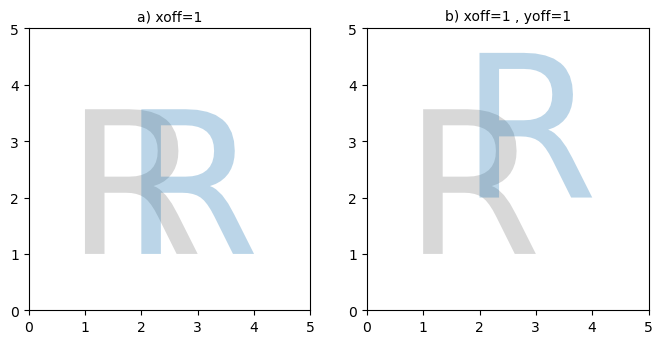

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt


f , ax = plt.subplots(1,2 , figsize=(8,8))

gpd.GeoDataFrame([R] , columns=["geometry"]).plot(ax=ax[0] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([translate_a] , columns=["geometry"]).plot(ax=ax[0] , alpha=0.3)
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)
ax[0].set_title("a) xoff=1" , fontsize=10)

gpd.GeoDataFrame([R] , columns=["geometry"]).plot(ax=ax[1] , facecolor="gray" , alpha=0.3)
gpd.GeoDataFrame([translate_b] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,5)
ax[1].set_title("b) xoff=1 , yoff=1" , fontsize=10)